In [1]:
# Importing Libaries and Loading Dataset 

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('D:\DataDrrivenFallstask\primary_data.csv')

In [2]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115128 entries, 0 to 115127
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cpsc_case_number   115128 non-null  int64  
 1   narrative          115128 non-null  object 
 2   treatment_date     115128 non-null  object 
 3   age                115128 non-null  int64  
 4   sex                115128 non-null  int64  
 5   race               115128 non-null  int64  
 6   other_race         1022 non-null    object 
 7   hispanic           115128 non-null  int64  
 8   diagnosis          115128 non-null  int64  
 9   other_diagnosis    2522 non-null    object 
 10  diagnosis_2        43145 non-null   float64
 11  other_diagnosis_2  4978 non-null    object 
 12  body_part          115128 non-null  int64  
 13  body_part_2        43145 non-null   float64
 14  disposition        115128 non-null  int64  
 15  location           115128 non-null  int64  
 16  fi

In [3]:
# Filling Nan values with appropriate values

df['other_race'] = df['other_race'].fillna('UNKNOWN')
df['alcohol'] = df['alcohol'].fillna(0).astype('int64')
df['drug'] = df['drug'].fillna(0).astype('int64')
df['body_part_2'] = df['body_part_2'].fillna(75.0).astype('int64')
df['hispanic'] = df['hispanic'].fillna(0).astype('int64')
df['diagnosis_2'] = df['diagnosis_2'].fillna(53.0).astype('int64')
df['other_diagnosis'].fillna('Pain',inplace=True)
df['other_diagnosis_2'].fillna('Pain',inplace=True)


In [4]:
# Seprating numerical and string columns

string_values = []
numerical_values=[]
for column in df.columns:
    if df[column].dtype == 'object':
        string_values.append(column)
    else:
        numerical_values.append(column)

print(string_values)

print(numerical_values)

['narrative', 'treatment_date', 'other_race', 'other_diagnosis', 'other_diagnosis_2']
['cpsc_case_number', 'age', 'sex', 'race', 'hispanic', 'diagnosis', 'diagnosis_2', 'body_part', 'body_part_2', 'disposition', 'location', 'fire_involvement', 'alcohol', 'drug', 'product_1', 'product_2', 'product_3']


In [5]:
# label Encoding values of some string variables
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in string_values:
    df[i] = encoder.fit_transform(df[i])

In [6]:
# Dropping unwanted columns
modifed_df=df.drop(columns=['cpsc_case_number','narrative','treatment_date'], axis=1)

In [7]:
# Scalling varibles 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(modifed_df)

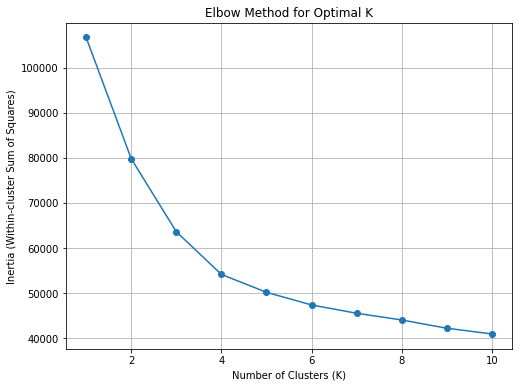

In [16]:
# Getting the optimal K values using Elbow Method 
from sklearn.cluster import KMeans
inertia_values = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

In [8]:
# Removing the dispostion column and getting the kmeans
# Drop Disposistion
droped_dip=modifed_df.drop(['disposition'], axis=1)

In [9]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(droped_dip)

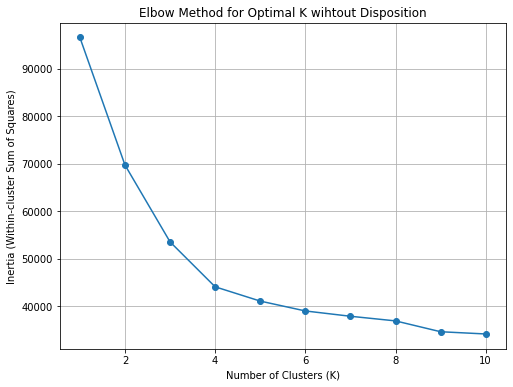

In [20]:
# Estimating K value without the Dispositon using Elbow method 

from sklearn.cluster import KMeans
inertia_values = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K wihtout Disposition')
plt.grid(True)
plt.show()

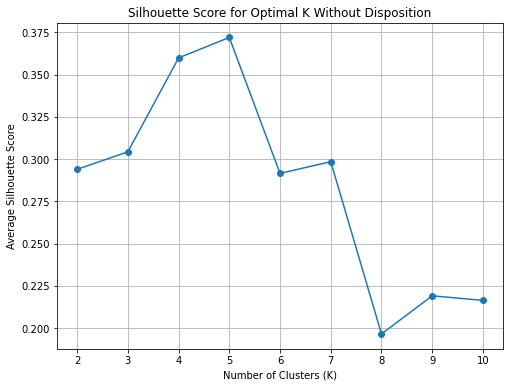

Optimal K (Silhouette Score): 5


In [21]:
# Estimating K value using Silhouette Score


from sklearn.metrics import silhouette_score
k_values = range(2, 11) 

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score for Optimal K Without Disposition')
plt.grid(True)
plt.show()

optimal_k_silhouette = k_values[np.argmax(silhouette_scores)]
print("Optimal K (Silhouette Score):", optimal_k_silhouette)


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(modifed_df)
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(droped_dip)

In [12]:
# Getting Feature Importance of each variable according to clusters

centroids = kmeans.cluster_centers_

feature_importance = {i: {} for i in range(5)}  

for feature_index, feature_name in enumerate(droped_dip.columns):
    for cluster_index in range(5):  
        cluster_mask = (clusters == cluster_index)
        cluster_data = scaled_data[cluster_mask, feature_index]
        centroid_value = centroids[cluster_index, feature_index]
        contribution = abs(cluster_data - centroid_value).mean()
        feature_importance[cluster_index][feature_name] = contribution

for cluster_index, importance_dict in feature_importance.items():
    print(f"Cluster {cluster_index + 1} Feature Importance:")
    total_contribution = sum(importance_dict.values())
    normalized_importance = {feature: importance / total_contribution for feature, importance in importance_dict.items()}
    sorted_features = sorted(normalized_importance.items(), key=lambda x: x[1], reverse=True)
    for feature, importance in sorted_features:
        print(f"  Feature: {feature}, Normalized Importance: {importance:.4f}")


Cluster 1 Feature Importance:
  Feature: product_1, Normalized Importance: 0.7774
  Feature: other_diagnosis_2, Normalized Importance: 0.0759
  Feature: other_diagnosis, Normalized Importance: 0.0598
  Feature: age, Normalized Importance: 0.0154
  Feature: body_part_2, Normalized Importance: 0.0139
  Feature: body_part, Normalized Importance: 0.0126
  Feature: diagnosis, Normalized Importance: 0.0114
  Feature: diagnosis_2, Normalized Importance: 0.0108
  Feature: product_2, Normalized Importance: 0.0095
  Feature: product_3, Normalized Importance: 0.0073
  Feature: other_race, Normalized Importance: 0.0047
  Feature: location, Normalized Importance: 0.0004
  Feature: sex, Normalized Importance: 0.0003
  Feature: hispanic, Normalized Importance: 0.0002
  Feature: race, Normalized Importance: 0.0002
  Feature: fire_involvement, Normalized Importance: 0.0002
  Feature: drug, Normalized Importance: 0.0001
  Feature: alcohol, Normalized Importance: 0.0000
Cluster 2 Feature Importance:
  Fe

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(modifed_df)

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

modifed_df['Cluster'] = clusters

means_by_cluster = modifed_df.groupby('Cluster').mean()

In [14]:
means_by_cluster.T

Cluster,0,1,2,3,4
age,80.553768,79.817144,72.534416,76.434783,77.866498
sex,1.634274,1.631232,1.381671,1.565217,1.649839
race,0.228312,1.117990,0.819412,1.173913,0.815469
other_race,24.000000,23.904791,23.960557,24.000000,23.951330
hispanic,0.029296,1.943707,1.275715,1.391304,1.328799
diagnosis,59.073029,59.084592,59.694122,56.739130,57.475836
other_diagnosis,308.343875,308.081690,308.112142,309.000000,305.426072
diagnosis_2,55.083938,55.750921,61.847641,55.043478,55.119455
other_diagnosis_2,391.142594,388.767496,390.478345,393.000000,388.893670
body_part,76.269520,77.286658,69.428461,64.000000,32.744959
